#### Config

In [1]:
# INPUTS
FILE_NAME = 'test.csv'

# Define a custom date string
custom_date_str = '2024-03-22'

# CONFIGURATIONS
MAX_ROW_TO_SHOW = None  # None  - Display all rows in DataSet 
                        # 0     - Display default value
                        # int   - Any positive integer number (N) will display N/2 top rows and N/2 bottom rows 
columns = ['B_COMP1_MAN_INH', 'B_COMP1_RQ', 'B_COMP1_RUN', 'B_COMP2_MAN_INH', 'B_COMP2_RQ', 'B_COMP2_RUN', 'B_COMP1_ENABLE', 'B_COMP2_ENABLE', 'B_COMP_ENABLE', 'VC_B_SETB_BLEND_ACT', 'VC_B_SETB_BLEND_AV', 'VC_R_AIR_FLOW', 'VC_R_BC_PRES', 'VC_R_BP_PRES', 'VC_R_EQU_RES_PRES', 'VC_R_MR_PRES', 'VC_Y_AUTO_BC_CMPRES', 'VC_Y_INDEP_BC_CMPRES', 'VC_Y_SETB_BLEND_FBK', 'R_AUTO_BRAKE_RQ', 'K4.VC_R_MR_PRES', 'VC_R_EBOG_LIM', 'VC_R_EBOG_PERF', 'VC_R_MC1EFF', 'VC_R_MC2EFF', 'VC_R_MC3EFF', 'VC_R_EBOG_LIM', 'VC_R_EBOG_PERF', 'VC_R_MC1EFF', 'VC_R_MC2EFF', 'VC_R_MC3EFF', 'BC_B_SETB_BLEND_RQ', 'BC_Y_BC_BLEND_SETB_RQ', 'B_EDBRK_ENA', 'R_BBEFFREQ', 'B_EDBRK_ENA', 'R_BBEFFREQ', 'KS3_VC_B_2COMP2_7', 'KS3_VC_B_2COMP4_2', 'KS3_VC_B_2COMPCTFK', 'KS3_VC_B_2COMPTEMP', 'KS3_VC_B_COMP2_7', 'KS3_VC_B_COMP4_2', 'KS3_VC_B_COMPCTFK', 'KS3_VC_B_COMPTEMP', 'VC_KS3_B_2COMPCTRL', 'VC_KS3_B_COMPCTRL', 'R_K4_BC1PRESR_LOCSPD_VALUE', 'R_K4_BC2PRES_VALUE', 'M_PRO_BB_TE_1.R_LOCSPD', 'R_LOCSPD']

##### Imports & Options

In [2]:
# Imports & dependencies 
import re
import csv
import pandas as pd
import panel as pn
import hvplot.pandas
import holoviews as hv
import panel.widgets as pnw

# OPTIONS
pd.set_option('display.max_rows', MAX_ROW_TO_SHOW)

##### Formating Data

In [3]:
df = pd.read_csv(FILE_NAME)
df.drop(df.columns[[0, 1, 2, -1]], axis=1, inplace=True)
# Convert the custom date string to a Pandas DateTime object
custom_date = pd.to_datetime(custom_date_str)

df['Time'] = df['Time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S:%f').replace(year=custom_date.year, month=custom_date.month, day=custom_date.day))

### Test Runs

Find attached the test we spoke about in the meeting:

- 12:17:36 -> EMER Handle A, Cab A active, tank in Cab A
- 12:19:29 -> EMER Handle B, Cab A active, tank in A -> It does not fully vent BP (the final venting after the pressure gets stable is done by the other handle put in EMER in order to release brakes).
- 12:28:41 -> EMER Handle B, Cab B active, tank in A
- 12:30:45 -> EMER Handle A, Cab B active, tank in A
- 12:38:05 -> EMER Handle B, Cab B active, tank in B
- 12:40:44 -> EMER Handle A, Cab B active, tank in B
- 12:45:08 -> EMER Handle A, Cab A active, tank in B -> It does not fully vent BP (the final venting after the pressure gets stable is done by the other handle put in EMER in order to release brakes).
- 12:47:00 -> EMER Handle B, Cab A active, tank in B -> It It does not fully vent BP (the final venting after the pressure gets stable is done by the other handle put in EMER in order to release brakes).

As for the vent valves activation, when triggered from cab B with active cab or always with cab A the EBV and the panel vent valves are working.
When triggered from cab B and the cab is not active only EBV B is venting.
In no scenario, the type #8 valves are venting.

#### Display Data

##### code

In [12]:
start_minute = 17
end_minute = 19
filtered_df = df[(df['Time'].dt.minute >= start_minute) & (df['Time'].dt.minute <= end_minute)]

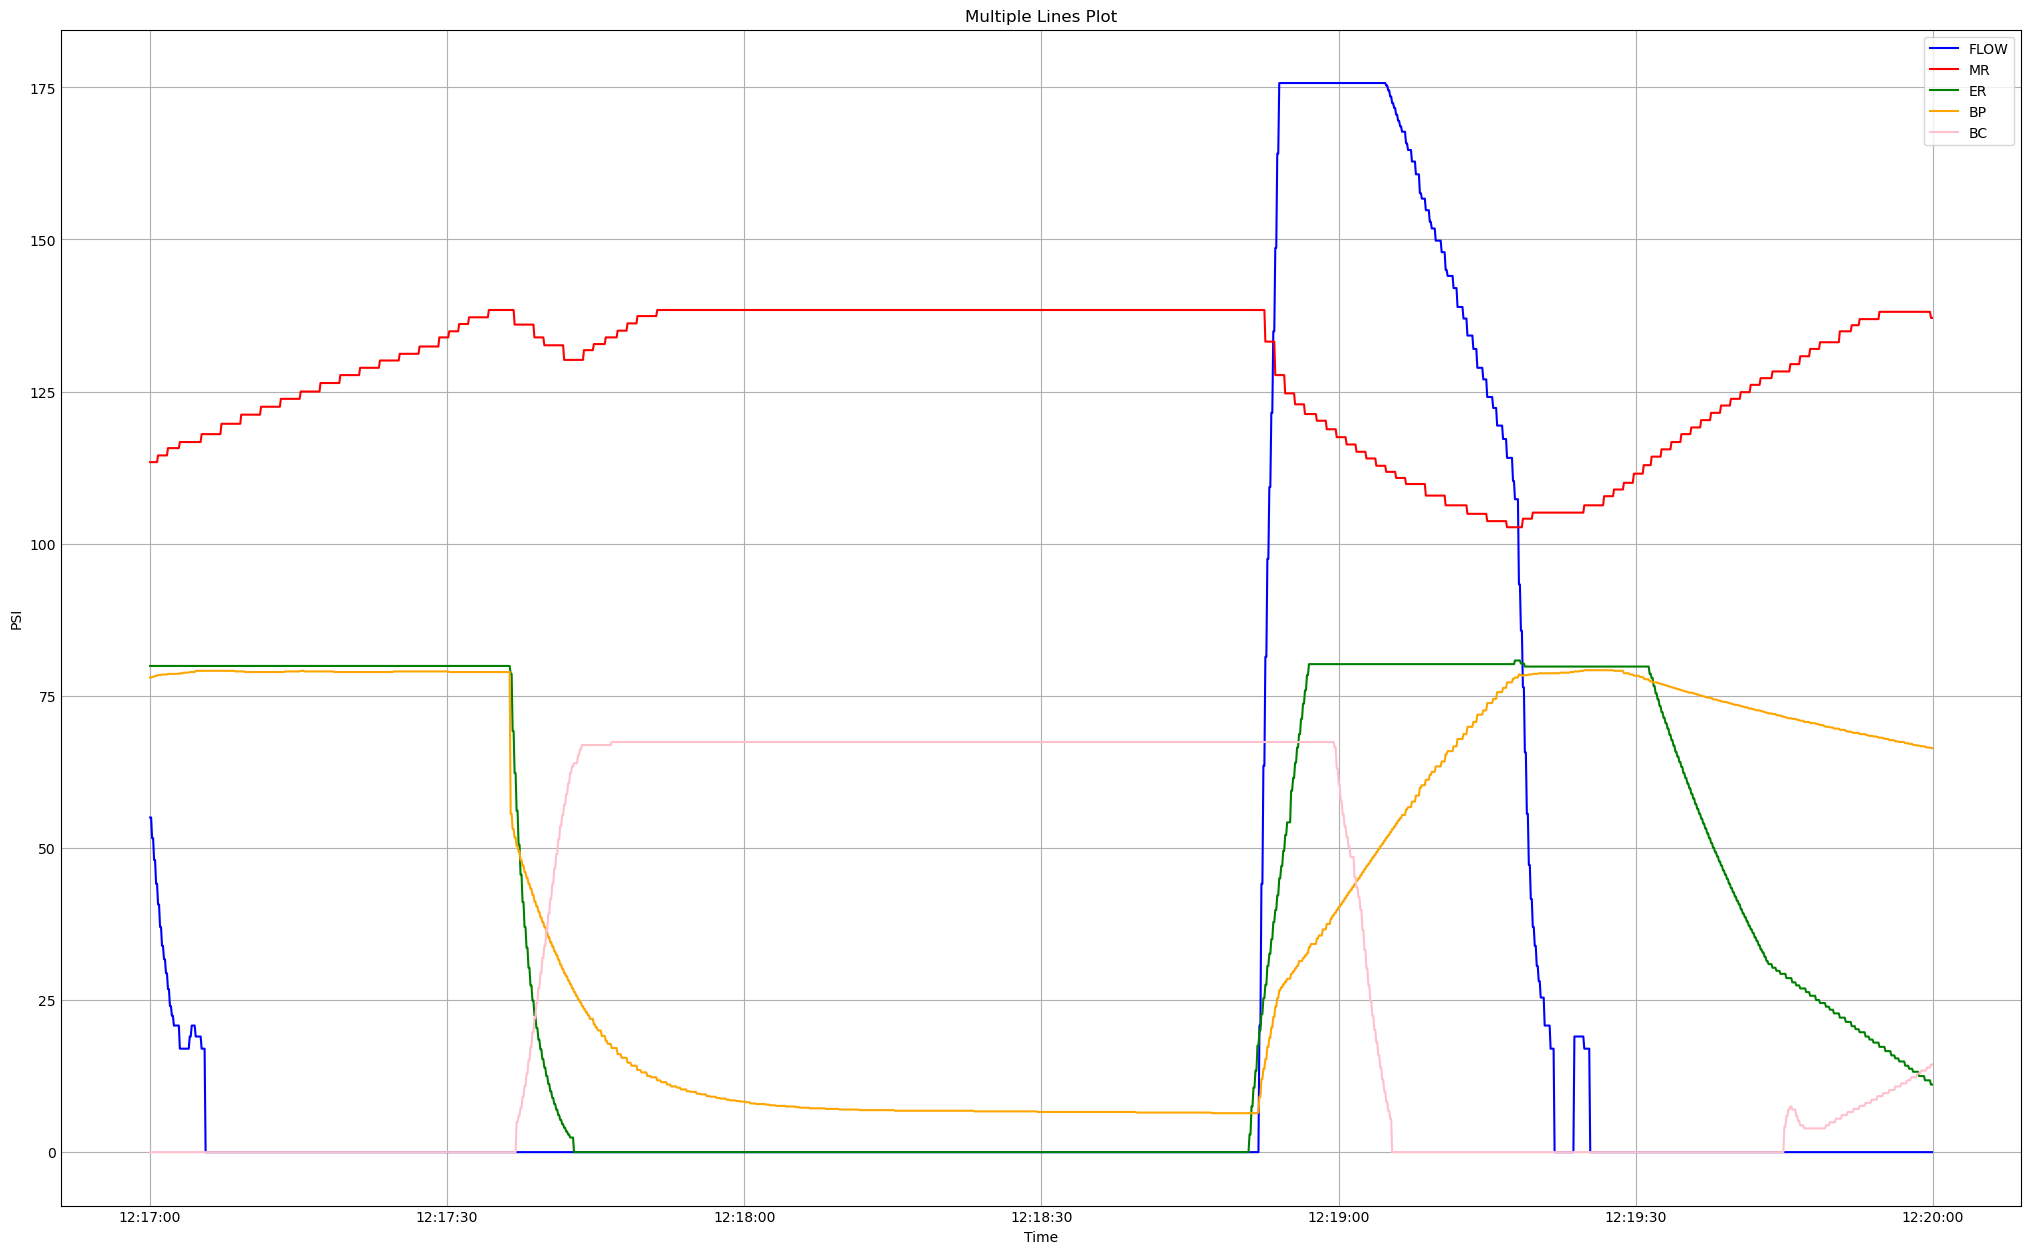

In [14]:
def plot_multiple_lines(df, x_col, y_cols, colors, linestyles, labels):
    """
    Plot multiple lines from DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - x_col: Name of the column to use for the X-axis.
    - y_cols: List of column names to use for the Y-axis.
    - colors: List of colors for each line.
    - linestyles: List of linestyles for each line.
    - labels: List of labels for each line.
    """
    plt.figure(figsize=(20, 12))
    plt.style.use('_mpl-gallery')

    for y_col, color, linestyle, label in zip(y_cols, colors, linestyles, labels):
        plt.plot(df[x_col], df[y_col], linestyle=linestyle, color=color, label=label)

# Define parameters for plotting
x_col = 'Time'
y_cols = ['VC_R_AIR_FLOW', 'VC_R_MR_PRES', 'VC_R_EQU_RES_PRES', 'VC_R_BP_PRES', 'VC_R_BC_PRES']
colors = ['blue', 'red', 'green', 'orange', 'pink']
linestyles = ['-'] * len(y_cols)  # Use solid lines
labels = ['FLOW', 'MR', 'ER', 'BP', 'BC']

# Plot multiple lines using the subroutine
plot_multiple_lines(filtered_df, x_col, y_cols, colors, linestyles, labels)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('PSI')
plt.title('Multiple Lines Plot')
plt.legend()

# Show plot
plt.show()
